In [33]:
# 📜 Problem Context:
# The Digits dataset from scikit-learn consists of 8x8 pixel grayscale images of handwritten digits (0 through 9). It’s a popular dataset for image classification, where the task is to identify what digit a given image represents.

# Here’s a breakdown of the problem:

# 1. Dataset Overview:
# 1797 samples: These are images of handwritten digits.

# 64 features per sample: Since the images are 8x8 pixels, each image is flattened into a 64-dimensional vector (8x8 = 64).

# Each number (pixel intensity) ranges from 0 to 16, where 0 means white (no ink) and 16 means dark (strong ink).

# 10 classes (0-9): These represent the digits we’re trying to classify.

# Goal: Given an 8x8 image, predict which digit (0-9) it represents.

# 2. Target:
# The target labels (digits.target) contain the digit labels (0, 1, 2, ..., 9) corresponding to each image.

# Each image has a corresponding target label representing the digit it represents.

# 3. Features (X):
# The features are the pixel intensities in a flattened 64-dimensional vector.

# For example, if an image of the digit '3' was displayed in an 8x8 grid, the vector would contain values representing the intensity of each of the 64 pixels.

# 🔍 The Goal of the Problem:
# Your task is to train a model to classify the digit based on the pixel intensities (the 64 features). For this, you'll use the K-Nearest Neighbors (KNN) algorithm, which is a simple but powerful classification technique.

# 1. Training Phase:
# You’ll provide the model with images (features) and their correct labels (target).

# The model will “learn” the relationship between pixel intensities and the digit label.

# 2. Prediction Phase:
# Once trained, you can provide the model with a new image (its 64 features) and it will predict the digit label.

# 📊 Why KNN?
# KNN is a simple, intuitive instance-based learning algorithm. It doesn't require a model to be built or parameters to be tuned ahead of time.

# In KNN, given a new data point (in this case, a new image), the algorithm:

# Finds the K nearest neighbors to the new point (based on their feature similarity).

# Looks at the labels of those neighbors.

# Returns the most common label (majority voting) among those neighbors as the predicted class for the new point.

# 🛠 How We Approach the Problem:
# Load the Data:

# We load the Digits dataset using load_digits(). This gives us both the features and labels of the data.

# Data Splitting:

# Split the dataset into training and testing sets. We'll train the model on the training set and test it on the test set to see how well it performs.

# Model Creation:

# Create a KNN classifier (KNeighborsClassifier).

# Choose K=3 (i.e., the algorithm will look at the 3 nearest neighbors to make predictions).

# Training the Model:

# Train the model using the training data (X_train and y_train).

# Making Predictions:

# Predict the digit labels for the test set (X_test) using the trained KNN model.

# Evaluation:

# Measure the accuracy of the model by comparing the predicted labels (y_pred) with the actual labels (y_test).

# 📈 Why is this Problem Important?
# Image Classification is a core task in computer vision and is used in many real-world applications, such as:

# Handwritten digit recognition in postal services (automating mail sorting).

# Medical imaging (detecting diseases from images).

# Object recognition in self-driving cars.

# The Digits dataset is often used for benchmarking machine learning algorithms because it is small and easy to understand.

# 🔄 Steps for Solving the Problem (Brief Recap):
# Load and explore the dataset.

# Split the data into training and testing sets.

# Create a KNN classifier with the appropriate parameters.

# Train the model using the training data.

# Evaluate the model using the test data and compute accuracy.

In [34]:
!pip install scikit-learn matplotlib seaborn


In [35]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

'''
load_digits -->load the dataset of handwritten digits
train_test_split --> help to split the data into training and test sets
import KNeighborsClassifier --> import use to extract the file of KNN algo 


'''


'\nload_digits -->load the dataset of handwritten digits\ntrain_test_split --> help to split the data into training and test sets\nimport KNeighborsClassifier --> import use to extract the file of KNN algo \n\n\n'

In [36]:

digits = load_digits()
digits.data.shape #(1797, 64)


 #(1797, 64)
# '''
# Loads the 1797 digit image into the variable digits

# digits.data --the pixel values(64 numbers per image)
# digits.target --the actual digit for each image(0,1,2,3..)
# digits.images -->the 8*8 pixel grid for each digit(used for drawing)


# '''


(1797, 64)

In [37]:
digits.target.shape #(1797,)

(1797,)

In [58]:
lt=digits.target #(1797,)
print(len(lt))

1797


In [38]:
digits.images[13] 

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [39]:
digits.target[::170] #Give me the digit label from every 170th image.

array([0, 8, 2, 4, 6, 5, 9, 5, 9, 2, 5])

In [40]:
digits.data[13] #Give me the 14th image’s pixel values (index starts from 0)

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [41]:
l=digits.data[2]
print(l)

[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]


In [42]:
print(len(l))

64


In [60]:
#EXPLORING DATA
#print(digits.DESCR)
#digits.target[::100]  # Every 100th label

# The data array contains the 1797 samples (the digit images), each with
# 64 features, having values in the range 0–16, representing pixel intensities.

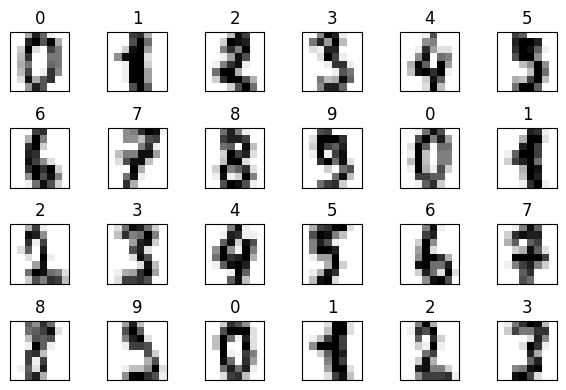

In [44]:
import matplotlib.pyplot as plt
figure,axes=plt.subplots(nrows=4,ncols=6,figsize=(6,4))#create a grid of empty boxes
for ax,image,label in zip(axes.ravel(),digits.images,digits.target):
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)
plt.tight_layout()
plt.show()

# explaination
# line2 --> rows=4,cols=6, figure_size=6,4 in inches
# 24 boxes total
# subplots--> A function that creats multiple plots(small boxes) in one figure
# figure and axes are variables 

# line3 -->
# zip() -->combines multiple list into single tuples

# ax,image,label are variables
# axes.ravel() --> make 4*6 grid into a sinngle boxes
# digits.images --> A list of 8*8 grayscale digit images(1797 images total)
# digits.target --> the actual digit label for each image

# imshow() --> image Show.It displays an image in that subplot box
# cmap --> means color map, i.e. how pixel values are turned into colors
# gray_r --> is reverered grayscale i.e. low values(like 0) =white and high values (like 16) = black

# Tick marks = axis lines and numbers (used in graphs).

# We turn them off to keep the digit images clean and clear.
# ax.set_xticks([])
# ax.set_yticks([])
#     both used to remove tick marks

# ax.set_title(label)
# set_title --> write a title on top of the subplot
# label --> the digit label (0-9) this is what the image's actual number

# plt.tight_layout()
# adjust the spacing b/w plots automatically. prevent overlapping of text and image.

# plt.show() --> shows the final output




In [45]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=11)
'''
doubt assign kaise ho raha
'''


# model_selection --> tools to split datasets, cross-validate etc.

# digits.data --> (features i.e. i/p data),each image
# is convertes into list of 64 numbers (8*8)

# digits.target --> actual digit from 0-9
# train_test_split() --> suffles the data randomly
#     split it into two sets:
#         one for training (to teach the model)
#            one for testing(to check the model)

# by default, it splits:
# 75% training
# 25% testing

# X_train-->i/p data to train the model
# X_test --> i/p data to test the model
# y_test --> actual digit labels for training
# y_train --> Actual digits label for testing 

# reandom_state=11 --> it says split the data in same ways every time I run this code


In [46]:
print("X_train shape:", X_train.shape)  
print("X_test shape:", X_test.shape)    
print("Y_test shape:", y_train.shape)    
print("Y_test shape:", y_test.shape)    

X_train shape: (1347, 64)
X_test shape: (450, 64)
Y_test shape: (1347,)
Y_test shape: (450,)


In [47]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

# KNeighboursClassifier() --> this is the algorithm from the sklearn.neighbors module
# it create the machine learning model that classifies new data points based on the K nearest neigbours
# .fit() --> this method tell the model to learn from data
# knn holds the trained data and ready to make prediction


KNeighborsClassifier()

In [48]:
# now we make prediction from the trained model
predicted =knn.predict(X_test) #predict the number written in all 450 test images
expected=y_test
print('First 20 prediction:', predicted[::20])
# From the full list of 450 predictions, just show me every 20th one.
print('First 20 actual lables data', predicted[::20])



# predict() --> this is the function that asked the model 
# " Look  that new X_test data and predict the number in the image"
# X_test is the data that model newver see it before
#by looking at the image of X_test data model is trying to pridict the correct number on the image





First 20 prediction: [0 9 3 2 0 2 1 4 3 5 9 7 5 8 0 3 1 9 7 1 8 3 0]
First 20 actual lables data [0 9 3 2 0 2 1 4 3 5 9 7 5 8 0 3 1 9 7 1 8 3 0]


In [49]:
#  now checking for wrong pediction
wrong =[(p,e) for (p,e) in zip(predicted,expected) if p!=e]
print('Number of wrong predictions: ', len(wrong))
print('Example of wrong prediction  (predicted, expected):', wrong[:10])

Number of wrong predictions:  10
Example of wrong prediction  (predicted, expected): [(np.int64(5), np.int64(3)), (np.int64(8), np.int64(9)), (np.int64(4), np.int64(9)), (np.int64(7), np.int64(3)), (np.int64(7), np.int64(4)), (np.int64(2), np.int64(8)), (np.int64(9), np.int64(8)), (np.int64(3), np.int64(8)), (np.int64(3), np.int64(8)), (np.int64(1), np.int64(8))]


In [50]:
# Step	What We’ll Do
# 1️⃣	Evaluate current model with .score()
# 2️⃣	Try multiple values of k (like 1 to 20)
# 3️⃣	Plot accuracy vs. k
# 4️⃣	Pick best k and finalize model

In [51]:
# checking for accuracy score
print(f'\n KNN Accuracy: {knn.score(X_test,y_test):.2%}')

# how acutually accuraccy is calulated

#         Accuracy=Number of correct prediction/Total prediction
# same this is done by ' .score() ' method in python
# .2% is Python String formatting. means Roundoff to 2 decimal places
# if accuraccy is 0.9787 roundOff to 97.87%

# if your model got 440 out of 450 images right
# means 97.87% accuraccy



 KNN Accuracy: 97.78%


In [52]:
from sklearn.metrics import confusion_matrix, classification_report
# sklearn.metrics: is a library
# confusion_matrix: gives you a  2D matrix showing prediction vs Actual
# classification_report: gives prediction,recall,f1-score

confusion = confusion_matrix(expected, predicted)

# expected: the correct digits(y_test)
# predicted: what the model predicted(knn.predicted(X_test))

# confusion_matrix(): create a 2D matrix
# row=actual values
# columns=predicted values

print('\nConfusion Matrix:')
print(confusion)

# Cell (i, j) = number of times digit i was predicted as digit j


Confusion Matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]


In [53]:
# What is a Confusion Matrix?
# A confusion matrix is a table that shows the number of correct and incorrect predictions your model made, organized by actual vs. predicted classes.

# 🧮 Structure of the Matrix
# If you're classifying digits (0 to 9), the matrix will be 10x10:

# css
# Copy code
#            Predicted →  0  1  2  3  4  5  6  7  8  9
# Actual ↓                                  
#         0            [30  0  0  0  0  0  0  0  2  0]
#         1            [ 0 25  0  0  0  0  0  1  0  0]
#         2            [ 0  0 28  0  0  0  0  0  0  1]
#         ...
# 🔍 Each cell means:
# Row = Actual digit

# Column = What the model predicted

# Cell (i, j) = Number of times digit i was predicted as j

# ✅ Ideal Case: Perfect Matrix
# If your model is perfect, the matrix is diagonal like this:

# lua
# Copy code
# [[30  0  0]
#  [ 0 30  0]
#  [ 0  0 30]]
# All predictions match the actual values.

# ❌ Real Case: Mistakes Included
# Let’s say the model thinks 8 is sometimes a 3 or 9:

# css
# Copy code
#            Predicted
# Actual     8  9  3
#        8  [25 3 2]
# That means:

# 25 times correctly predicted as 8 ✅

# 3 times wrongly predicted as 9 ❌

# 2 times wrongly predicted as 3 ❌

# 🎯 Why Use It?
# Because accuracy alone isn’t enough.

# For example:

# If 95% of predictions are correct, that sounds good…

# But if the model never predicts "3" or always messes up "8", that's bad 😬

# 🔍 The confusion matrix helps you:
# Identify specific weaknesses

# Know which digits get confused with others

# Help you debug or improve your model

# 🔧 Use Case in Digit Classification
# Let's say:

# Your model has 98% accuracy

# But confusion matrix shows it often confuses 3 and 8

# That tells you:

# You may need more training data for 3 and 8

# Or try image preprocessing to help the model see better

# Or test other classifiers (SVM, Random Forest...)

In [54]:
names=[str(digit) for digit in digits.target_names]
print('\nClassification Report:')
print(classification_report(expected,predicted,target_names=names))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



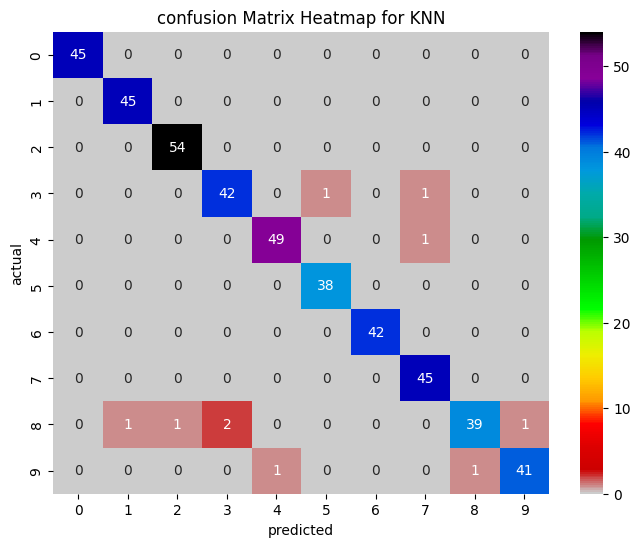

In [55]:
import matplotlib.pyplot as plt

#matplotlib.pyplot : for plotting charts/graphs
#seaborn : built on top of matplotlip makes plots prettier
# pandas use to convert the confusion matrix into table/dataframes

import seaborn as sns
import pandas as pd


confusion_df=pd.DataFrame(confusion,index=range(10),columns=range(10))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_df,annot=True,cmap='nipy_spectral_r')
plt.title('confusion Matrix Heatmap for KNN')
plt.ylabel("actual")
plt.xlabel("predicted")
plt.show()
                          

In [61]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Define estimators
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(),
    'GaussianNB': GaussianNB()
}

# Evaluate each estimator with 10-fold cross-validation
for name, model in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=model, X=digits.data, y=digits.target, cv=kfold)
    print(f"{name:>20}: mean accuracy = {scores.mean():.2%}; std deviation = {scores.std():.2%}")

KNeighborsClassifier: mean accuracy = 98.72%; std deviation = 0.75%
                 SVC: mean accuracy = 98.72%; std deviation = 0.79%
          GaussianNB: mean accuracy = 84.48%; std deviation = 3.47%


In [63]:
# Try different values of k from 1 to 19 (odd numbers)
'''Hyper parameter tuning'''
for k in range(1, 20, 2):
    # Create a KFold object for 10-fold cross-validation
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    
    # Initialize KNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation and get accuracy scores
    scores = cross_val_score(estimator=knn,
                             X=digits.data,
                             y=digits.target,
                             cv=kfold)
    
    # Print the average accuracy and standard deviation
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; '
          f'standard deviation={scores.std():.2%}')

# the value whith highest mean accuracy and lowest standard deviation are best for coosing K

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
